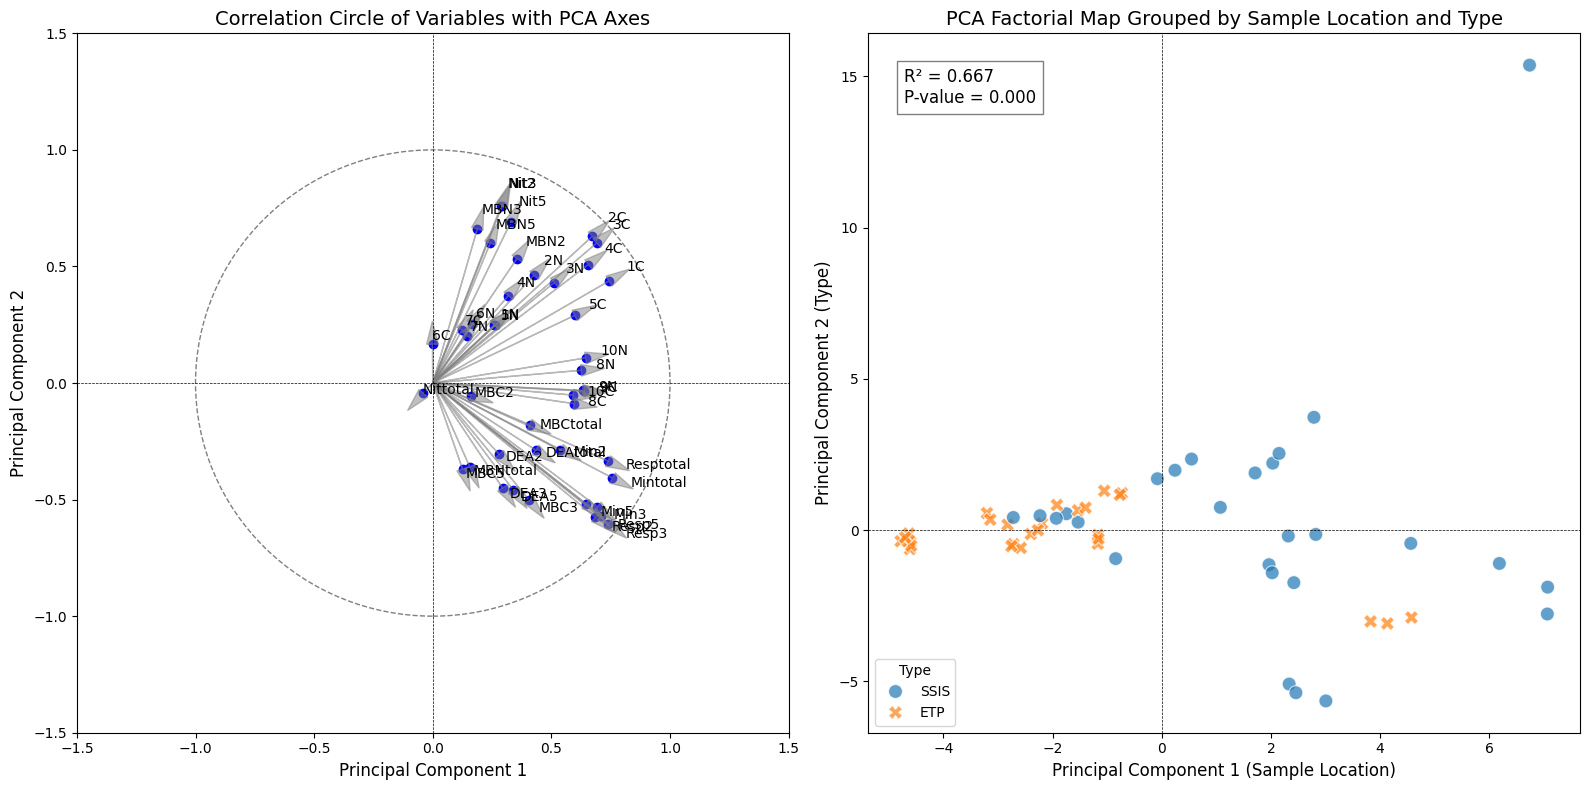

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

# Load your data
df = pd.read_excel(r'C:\Users\19085\Downloads\CorrelationData.xlsx')

# Select numeric columns for PCA
pca_columns = df.select_dtypes(include=[np.number]).columns.tolist()
pca_data = df[pca_columns].copy()

# Normalize the data
x = StandardScaler().fit_transform(pca_data)

# Perform PCA with 4 components
pca = PCA(n_components=4)
principal_components = pca.fit_transform(x)

# Create a DataFrame for PCA results (with 4 principal components)
pca_results = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_results['Sample Location'] = df['Samplelocation']  
pca_results['Type'] = df['Type']  

# Eigenvalues and Eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Loadings (eigenvectors scaled by the square root of explained variance)
loadings = eigenvectors.T * np.sqrt(eigenvalues)

# Calculate R² and p-values for ANOVA (for PC1 and PC2)
groups = [pca_results[pca_results['Type'] == type_]['PC1'] for type_ in pca_results['Type'].unique()]
f_stat, p_value = f_oneway(*groups)
r_squared = 1 - (f_stat / (f_stat + len(pca_results) - 1))  # Between-class variance

# Calculate Correlation Matrix of Principal Components
correlation_matrix = np.corrcoef(principal_components.T)

# Total variance (sum of eigenvalues)
total_variance = np.sum(eigenvalues)

# Variance percentage for each component
variance_percentage = (eigenvalues / total_variance) * 100

# Create DataFrames for each of the results
eigenvalues_df = pd.DataFrame(eigenvalues, index=['PC1', 'PC2', 'PC3', 'PC4'], columns=['Eigenvalue'])
variance_percentage_df = pd.DataFrame(variance_percentage, index=['PC1', 'PC2', 'PC3', 'PC4'], columns=['Variance Percentage'])

# Transpose eigenvectors to match the correct shape for DataFrame (variables as index, PCs as columns)
eigenvectors_df = pd.DataFrame(eigenvectors.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=pca_columns)

# Loadings DataFrame (already aligned correctly)
loadings_df = pd.DataFrame(loadings, index=pca_columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Correlation Matrix DataFrame (between principal components)
correlation_matrix_df = pd.DataFrame(correlation_matrix, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=['PC1', 'PC2', 'PC3', 'PC4'])

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# a) Correlation Circle for 4 components (showing PC1 vs PC2)
axs[0].set_title('Correlation Circle of Variables with PCA Axes', fontsize=14)
axs[0].scatter(loadings_df['PC1'], loadings_df['PC2'], color='blue')

# Draw circles and arrows for variable loadings
circle = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
axs[0].add_artist(circle)

for i, var in enumerate(loadings_df.index):
    axs[0].arrow(0, 0, loadings_df['PC1'].iloc[i], loadings_df['PC2'].iloc[i],
                 color='gray', alpha=0.5, head_width=0.05, head_length=0.1)
    axs[0].text(loadings_df['PC1'].iloc[i] * 1.1, loadings_df['PC2'].iloc[i] * 1.1, var,
                 fontsize=10)

axs[0].set_xlim(-1.5, 1.5)
axs[0].set_ylim(-1.5, 1.5)
axs[0].set_xlabel('Principal Component 1', fontsize=12)
axs[0].set_ylabel('Principal Component 2', fontsize=12)
axs[0].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[0].axvline(0, color='black', linewidth=0.5, linestyle='--')

# b) PCA Factorial Map for 4 components (using PC1 and PC2)
sns.scatterplot(data=pca_results, x='PC1', y='PC2', hue='Type', style='Type', ax=axs[1], s=100, alpha=0.7)
axs[1].set_title('PCA Factorial Map Grouped by Sample Location and Type', fontsize=14)
axs[1].set_xlabel('Principal Component 1 (Sample Location)', fontsize=12)
axs[1].set_ylabel('Principal Component 2 (Type)', fontsize=12)
axs[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[1].axvline(0, color='black', linewidth=0.5, linestyle='--')

# Display R² and p-value on the factorial map
axs[1].text(0.05, 0.9, f'R² = {r_squared:.3f}\nP-value = {p_value:.3f}', transform=axs[1].transAxes,
            fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})

# Save PCA results and additional information to Excel
with pd.ExcelWriter(r'C:\Users\19085\Downloads\N4PCA.xlsx') as writer:
    pca_results.to_excel(writer, sheet_name='PCA Results', index=False)
    loadings_df.to_excel(writer, sheet_name='Loadings')
    eigenvalues_df.to_excel(writer, sheet_name='Eigenvalues')
    variance_percentage_df.to_excel(writer, sheet_name='Variance Percentage')
    eigenvectors_df.to_excel(writer, sheet_name='Eigenvectors')
    correlation_matrix_df.to_excel(writer, sheet_name='Correlation Matrix')

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

# Load your data
df = pd.read_excel(r'C:\Users\19085\Downloads\CorrelationData.xlsx')

# Check available columns
print("Columns in the DataFrame:", df.columns.tolist())

# Select numeric columns for PCA
pca_columns = df.select_dtypes(include=[np.number]).columns.tolist()
pca_data = df[pca_columns].copy()

# Normalize the data
x = StandardScaler().fit_transform(pca_data)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Create a DataFrame for PCA results
pca_results = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_results['Samplelocation'] = df['Samplelocation']
pca_results['Type'] = df['Type']
pca_results['Name/ID'] = df['Name/ID']  # Updated column name

# Influence of Sample Location on total variables
sample_location_f_stat, sample_location_p_value = f_oneway(
    *[df[df['Samplelocation'] == location][pca_columns].mean(axis=1) for location in df['Samplelocation'].unique()]
)
print(f"\nInfluence of Sample Location on Total Variables:\nF-statistic: {sample_location_f_stat}, P-value: {sample_location_p_value}")

# Influence of Type on total variables
type_f_stat, type_p_value = f_oneway(
    *[df[df['Type'] == type_][pca_columns].mean(axis=1) for type_ in df['Type'].unique()]
)
print(f"\nInfluence of Type on Total Variables:\nF-statistic: {type_f_stat}, P-value: {type_p_value}")

# Influence of Name/ID on total variables
if 'Name/ID' in df.columns:  # Ensure 'Name/ID' column exists
    name_f_stat, name_p_value = f_oneway(
        *[df[df['Name/ID'] == name_][pca_columns].mean(axis=1) for name_ in df['Name/ID'].unique()]
    )
    print(f"\nInfluence of Name/ID on Total Variables:\nF-statistic: {name_f_stat}, P-value: {name_p_value}")
else:
    print("\n'Name/ID' column not found in the dataset.")


Columns in the DataFrame: ['Name/ID', 'Samplelocation', 'Type', 'DEAtotal', 'DEA2', 'DEA5', 'DEA3', 'MBCtotal', 'MBC2', 'MBC5', 'MBC3', 'MBNtotal', 'MBN2', 'MBN5', 'MBN3', 'Mintotal', 'Min2', 'Min5', 'Min3', 'Nittotal', 'Nit2', 'Nit5', 'Nit3', 'Resptotal', 'Resp2', 'Resp5', 'Resp3', '0.05C', '0.15C', '0.25C', '0.5C', '1C', '< 2 C', '2C', '> 2C', '2 -3.15C', '3.15-5C', '> 5C ', '0.05N', '0.15N', '0.25N', '0.5N', '1N', '< 2 N', '2N', '> 2N', '2 -3.15N', '3.15-5N', '> 5N', 'InNTotal', 'InN2', 'InN3', 'InN5']

Influence of Sample Location on Total Variables:
F-statistic: 3.9645777052359175, P-value: 0.02509683552439199

Influence of Type on Total Variables:
F-statistic: 12.399462866004919, P-value: 0.0009031444521354518

Influence of Name/ID on Total Variables:
F-statistic: 6.391435159156815, P-value: 0.00012646307162016759


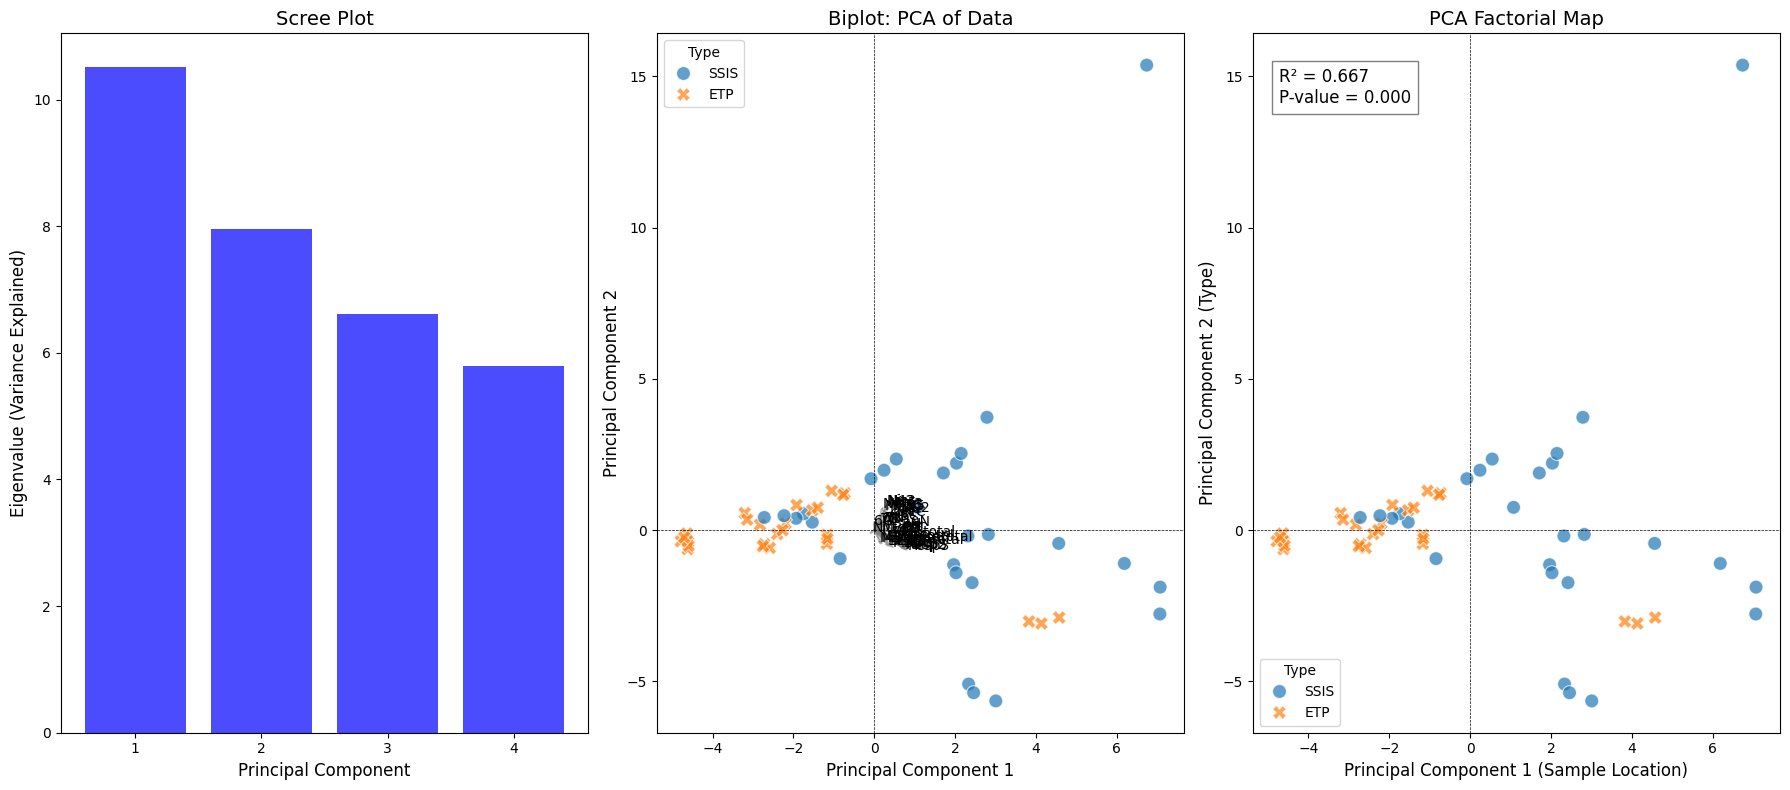

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

# Load your data
df = pd.read_excel(r'C:\Users\19085\Downloads\CorrelationData.xlsx')

# Select numeric columns for PCA
pca_columns = df.select_dtypes(include=[np.number]).columns.tolist()
pca_data = df[pca_columns].copy()

# Normalize the data
x = StandardScaler().fit_transform(pca_data)

# Perform PCA with 4 components
pca = PCA(n_components=4)
principal_components = pca.fit_transform(x)

# Create a DataFrame for PCA results (with 4 principal components)
pca_results = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_results['Sample Location'] = df['Samplelocation']  
pca_results['Type'] = df['Type']  

# Eigenvalues and Eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Loadings (eigenvectors scaled by the square root of explained variance)
loadings = eigenvectors.T * np.sqrt(eigenvalues)

# Calculate R² and p-values for ANOVA (for PC1 and PC2)
groups = [pca_results[pca_results['Type'] == type_]['PC1'] for type_ in pca_results['Type'].unique()]
f_stat, p_value = f_oneway(*groups)
r_squared = 1 - (f_stat / (f_stat + len(pca_results) - 1))  # Between-class variance

# Calculate Correlation Matrix of Principal Components
correlation_matrix = np.corrcoef(principal_components.T)

# Total variance (sum of eigenvalues)
total_variance = np.sum(eigenvalues)

# Variance percentage for each component
variance_percentage = (eigenvalues / total_variance) * 100

# Create DataFrames for each of the results
eigenvalues_df = pd.DataFrame(eigenvalues, index=['PC1', 'PC2', 'PC3', 'PC4'], columns=['Eigenvalue'])
variance_percentage_df = pd.DataFrame(variance_percentage, index=['PC1', 'PC2', 'PC3', 'PC4'], columns=['Variance Percentage'])

# Transpose eigenvectors to match the correct shape for DataFrame (variables as index, PCs as columns)
eigenvectors_df = pd.DataFrame(eigenvectors.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=pca_columns)

# Loadings DataFrame (already aligned correctly)
loadings_df = pd.DataFrame(loadings, index=pca_columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Correlation Matrix DataFrame (between principal components)
correlation_matrix_df = pd.DataFrame(correlation_matrix, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=['PC1', 'PC2', 'PC3', 'PC4'])

# Create a figure with three subplots for the new plots
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

# 1. Scree Plot (Eigenvalues)
axs[0].bar(range(1, 5), eigenvalues, color='blue', alpha=0.7)
axs[0].set_title('Scree Plot', fontsize=14)
axs[0].set_xlabel('Principal Component', fontsize=12)
axs[0].set_ylabel('Eigenvalue (Variance Explained)', fontsize=12)
axs[0].set_xticks(range(1, 5))
axs[0].axhline(0, color='black', linewidth=0.5, linestyle='--')

# 2. Biplot (PC1 vs PC2) - Loadings + Scores
axs[1].set_title('Biplot: PCA of Data', fontsize=14)

# Scatter plot for scores (data points)
sns.scatterplot(data=pca_results, x='PC1', y='PC2', hue='Type', style='Type', ax=axs[1], s=100, alpha=0.7)

# Arrows for loadings (variables)
for i, var in enumerate(loadings_df.index):
    axs[1].arrow(0, 0, loadings_df['PC1'].iloc[i], loadings_df['PC2'].iloc[i],
                 color='gray', alpha=0.5, head_width=0.05, head_length=0.1)
    axs[1].text(loadings_df['PC1'].iloc[i] * 1.1, loadings_df['PC2'].iloc[i] * 1.1, var,
                 fontsize=10)

axs[1].set_xlabel('Principal Component 1', fontsize=12)
axs[1].set_ylabel('Principal Component 2', fontsize=12)
axs[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[1].axvline(0, color='black', linewidth=0.5, linestyle='--')

# 3. PCA Factorial Map (PC1 vs PC2)
axs[2].set_title('PCA Factorial Map', fontsize=14)
sns.scatterplot(data=pca_results, x='PC1', y='PC2', hue='Type', style='Type', ax=axs[2], s=100, alpha=0.7)

# Display R² and p-value on the factorial map
axs[2].text(0.05, 0.9, f'R² = {r_squared:.3f}\nP-value = {p_value:.3f}', transform=axs[2].transAxes,
            fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})

axs[2].set_xlabel('Principal Component 1 (Sample Location)', fontsize=12)
axs[2].set_ylabel('Principal Component 2 (Type)', fontsize=12)
axs[2].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[2].axvline(0, color='black', linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()

# Save PCA results and additional information to Excel
with pd.ExcelWriter(r'C:\Users\19085\Downloads\N4PCA2.xlsx') as writer:
    pca_results.to_excel(writer, sheet_name='PCA Results', index=False)
    loadings_df.to_excel(writer, sheet_name='Loadings')
    eigenvalues_df.to_excel(writer, sheet_name='Eigenvalues')
    variance_percentage_df.to_excel(writer, sheet_name='Variance Percentage')
    eigenvectors_df.to_excel(writer, sheet_name='Eigenvectors')
    correlation_matrix_df.to_excel(writer, sheet_name='Correlation Matrix')


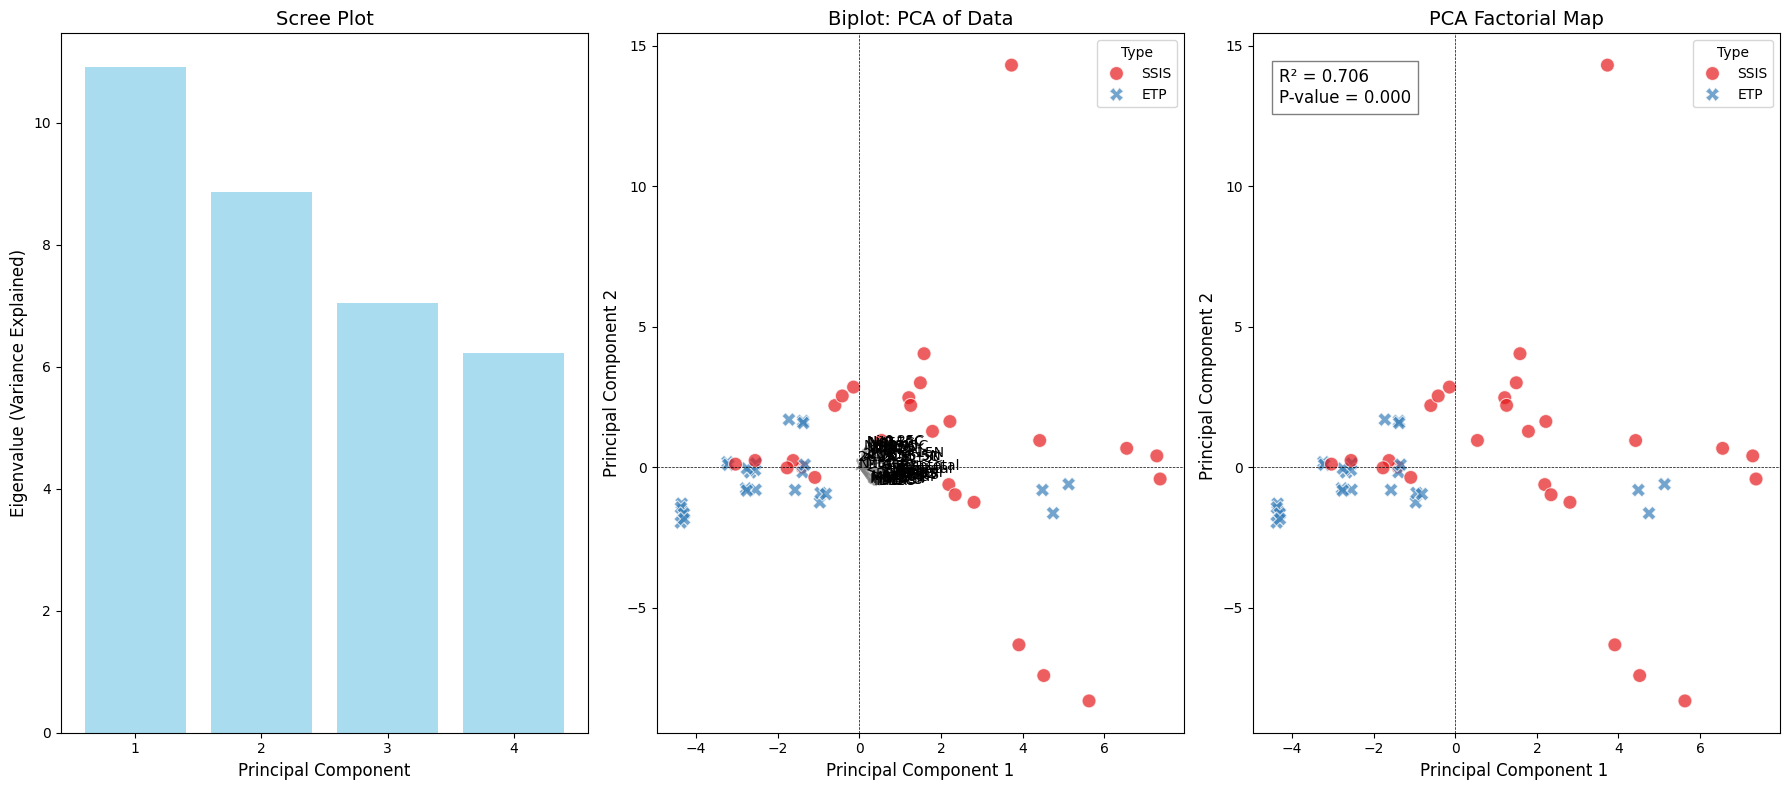

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

# Load your data
df = pd.read_excel(r'C:\Users\19085\Downloads\CorrelationData.xlsx')

# Select numeric columns for PCA
pca_columns = df.select_dtypes(include=[np.number]).columns.tolist()
pca_data = df[pca_columns].copy()

# Normalize the data
x = StandardScaler().fit_transform(pca_data)

# Perform PCA with 4 components
pca = PCA(n_components=4)
principal_components = pca.fit_transform(x)

# Create a DataFrame for PCA results (with 4 principal components)
pca_results = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_results['Sample Location'] = df['Samplelocation']  
pca_results['Type'] = df['Type']  

# Eigenvalues and Eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Loadings (eigenvectors scaled by the square root of explained variance)
loadings = eigenvectors.T * np.sqrt(eigenvalues)

# Calculate R² and p-values for ANOVA (for PC1 and PC2)
groups = [pca_results[pca_results['Type'] == type_]['PC1'] for type_ in pca_results['Type'].unique()]
f_stat, p_value = f_oneway(*groups)
r_squared = 1 - (f_stat / (f_stat + len(pca_results) - 1))  # Between-class variance

# Calculate Correlation Matrix of Principal Components
correlation_matrix = np.corrcoef(principal_components.T)

# Total variance (sum of eigenvalues)
total_variance = np.sum(eigenvalues)

# Variance percentage for each component
variance_percentage = (eigenvalues / total_variance) * 100

# Create DataFrames for each of the results
eigenvalues_df = pd.DataFrame(eigenvalues, index=['PC1', 'PC2', 'PC3', 'PC4'], columns=['Eigenvalue'])
variance_percentage_df = pd.DataFrame(variance_percentage, index=['PC1', 'PC2', 'PC3', 'PC4'], columns=['Variance Percentage'])

# Transpose eigenvectors to match the correct shape for DataFrame (variables as index, PCs as columns)
eigenvectors_df = pd.DataFrame(eigenvectors.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=pca_columns)

# Loadings DataFrame (already aligned correctly)
loadings_df = pd.DataFrame(loadings, index=pca_columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Correlation Matrix DataFrame (between principal components)
correlation_matrix_df = pd.DataFrame(correlation_matrix, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=['PC1', 'PC2', 'PC3', 'PC4'])

# Set the color palette (similar to R4DS color style)
sns.set_palette("Set1")

# Create a figure with three subplots for the new plots
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

# 1. Scree Plot (Eigenvalues) showing explained variance
axs[0].bar(range(1, 5), eigenvalues, color='skyblue', alpha=0.7)
axs[0].set_title('Scree Plot', fontsize=14)
axs[0].set_xlabel('Principal Component', fontsize=12)
axs[0].set_ylabel('Eigenvalue (Variance Explained)', fontsize=12)
axs[0].set_xticks(range(1, 5))
axs[0].axhline(0, color='black', linewidth=0.5, linestyle='--')

# 2. Biplot (PC1 vs PC2) - Loadings + Scores
axs[1].set_title('Biplot: PCA of Data', fontsize=14)

# Scatter plot for scores (data points)
sns.scatterplot(data=pca_results, x='PC1', y='PC2', hue='Type', style='Type', ax=axs[1], s=100, alpha=0.7)

# Arrows for loadings (variables)
for i, var in enumerate(loadings_df.index):
    axs[1].arrow(0, 0, loadings_df['PC1'].iloc[i], loadings_df['PC2'].iloc[i],
                 color='gray', alpha=0.5, head_width=0.05, head_length=0.1)
    axs[1].text(loadings_df['PC1'].iloc[i] * 1.1, loadings_df['PC2'].iloc[i] * 1.1, var,
                 fontsize=10)

axs[1].set_xlabel('Principal Component 1', fontsize=12)
axs[1].set_ylabel('Principal Component 2', fontsize=12)
axs[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[1].axvline(0, color='black', linewidth=0.5, linestyle='--')

# 3. PCA Factorial Map (PC1 vs PC2)
axs[2].set_title('PCA Factorial Map', fontsize=14)
sns.scatterplot(data=pca_results, x='PC1', y='PC2', hue='Type', style='Type', ax=axs[2], s=100, alpha=0.7)

# Display R² and p-value on the factorial map
axs[2].text(0.05, 0.9, f'R² = {r_squared:.3f}\nP-value = {p_value:.3f}', transform=axs[2].transAxes,
            fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})

axs[2].set_xlabel('Principal Component 1 ', fontsize=12)
axs[2].set_ylabel('Principal Component 2 ', fontsize=12)
axs[2].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[2].axvline(0, color='black', linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()

# Save PCA results and additional information to Excel
with pd.ExcelWriter(r'C:\Users\19085\Downloads\N4PCA2.xlsx') as writer:
    pca_results.to_excel(writer, sheet_name='PCA Results', index=False)
    loadings_df.to_excel(writer, sheet_name='Loadings')
    eigenvalues_df.to_excel(writer, sheet_name='Eigenvalues')
    variance_percentage_df.to_excel(writer, sheet_name='Variance Percentage')
    eigenvectors_df.to_excel(writer, sheet_name='Eigenvectors')
    correlation_matrix_df.to_excel(writer, sheet_name='Correlation Matrix')


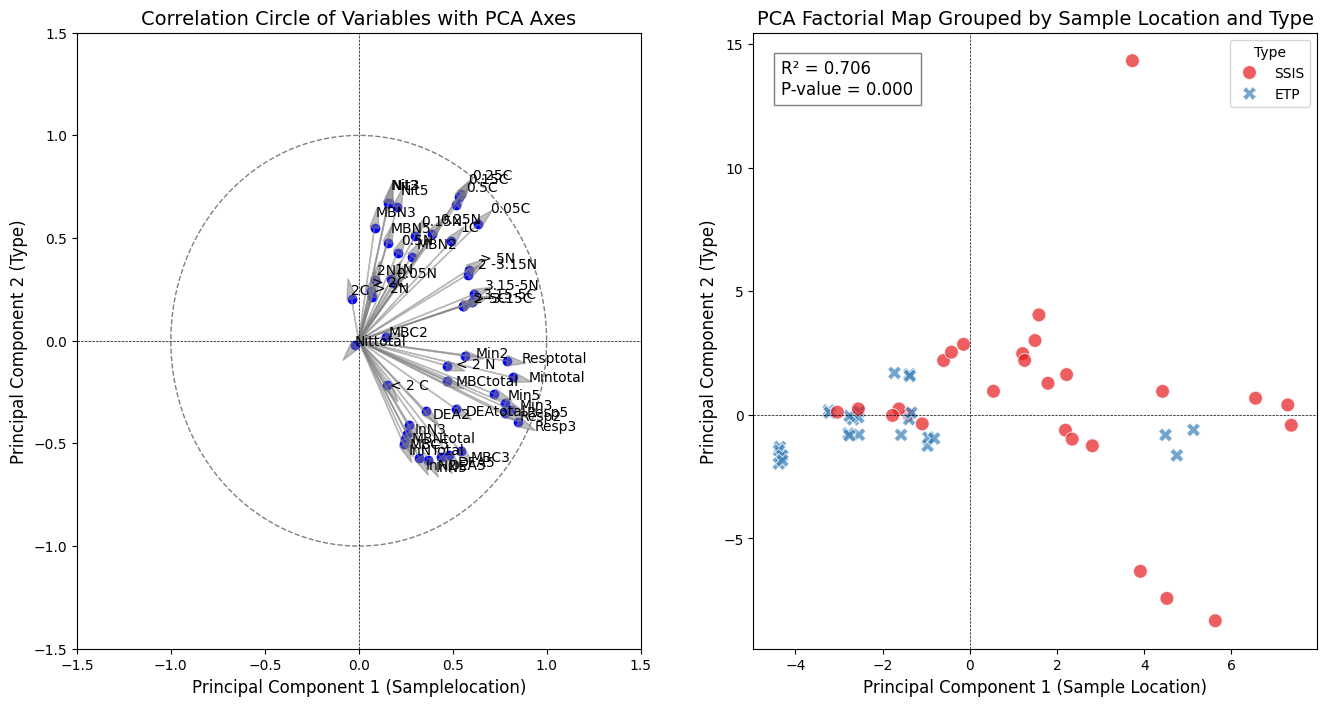

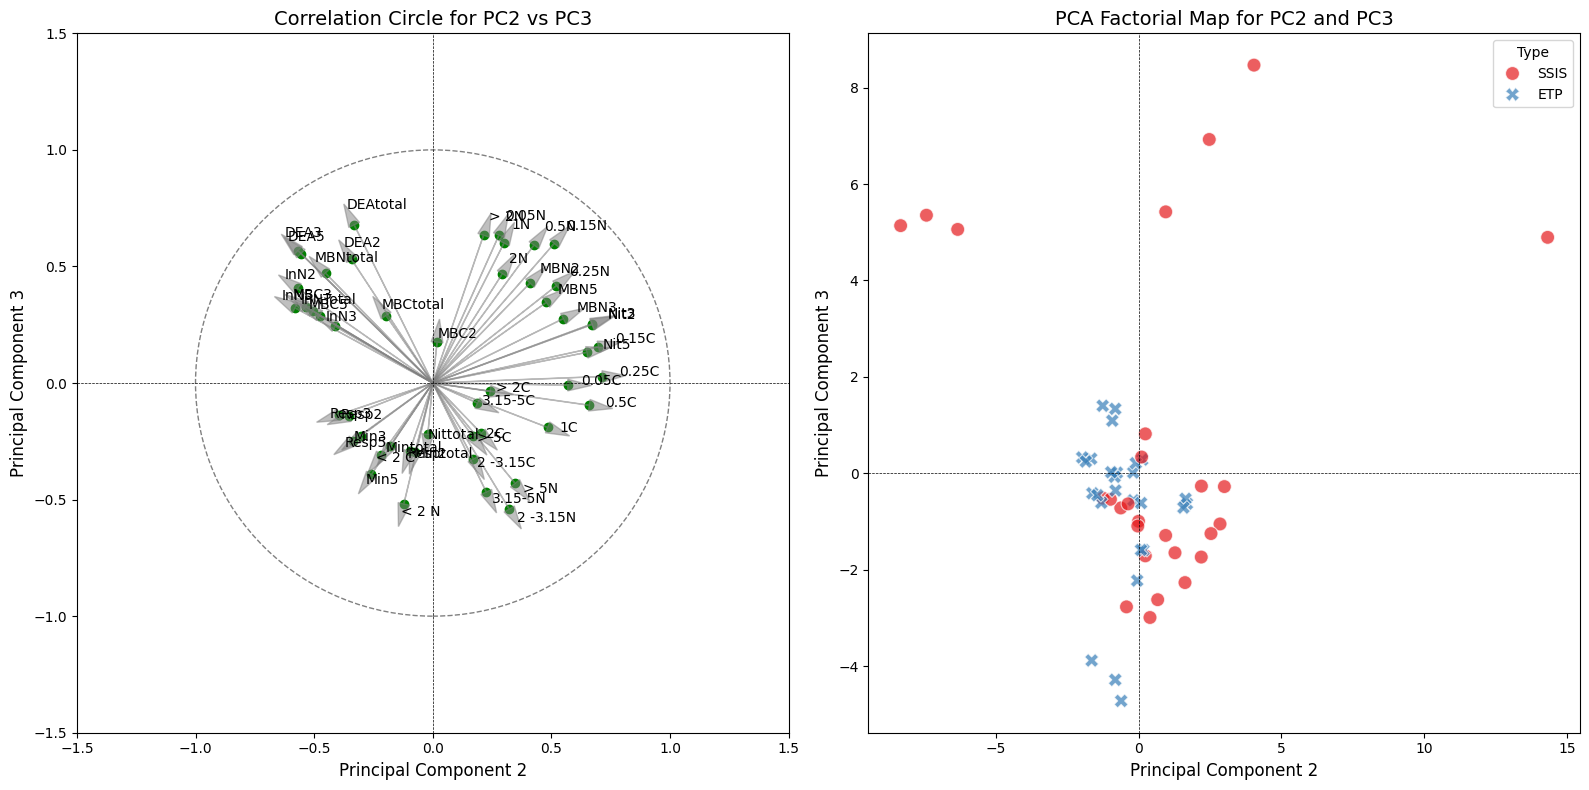

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

# Load your data
df = pd.read_excel(r'C:\Users\19085\Downloads\CorrelationData.xlsx')

# Select numeric columns for PCA
pca_columns = df.select_dtypes(include=[np.number]).columns.tolist()
pca_data = df[pca_columns].copy()

# Normalize the data
x = StandardScaler().fit_transform(pca_data)

# Perform PCA with 3 components (instead of 4)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(x)

# Create a DataFrame for PCA results (with 3 principal components)
pca_results = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_results['Sample Location'] = df['Samplelocation']  
pca_results['Type'] = df['Type']  

# Calculate R² and p-values for ANOVA (for PC1 and PC2)
groups = [pca_results[pca_results['Type'] == type_]['PC1'] for type_ in pca_results['Type'].unique()]
f_stat, p_value = f_oneway(*groups)
r_squared = 1 - (f_stat / (f_stat + len(pca_results) - 1))  # Between-class variance

# Calculate loadings for 3 components (instead of 4)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=pca_columns, columns=['PC1', 'PC2', 'PC3'])

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# a) Correlation Circle for 3 components (showing PC1 vs PC2)
axs[0].set_title('Correlation Circle of Variables with PCA Axes', fontsize=14)
axs[0].scatter(loadings_df['PC1'], loadings_df['PC2'], color='blue')

# Draw circles and arrows for variable loadings
circle = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
axs[0].add_artist(circle)

for i, var in enumerate(loadings_df.index):
    axs[0].arrow(0, 0, loadings_df['PC1'].iloc[i], loadings_df['PC2'].iloc[i],
                 color='gray', alpha=0.5, head_width=0.05, head_length=0.1)
    axs[0].text(loadings_df['PC1'].iloc[i] * 1.1, loadings_df['PC2'].iloc[i] * 1.1, var,
                 fontsize=10)

axs[0].set_xlim(-1.5, 1.5)
axs[0].set_ylim(-1.5, 1.5)
axs[0].set_xlabel('Principal Component 1 (', fontsize=12)
axs[0].set_ylabel('Principal Component 2 (Type)', fontsize=12)
axs[0].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[0].axvline(0, color='black', linewidth=0.5, linestyle='--')

# b) PCA Factorial Map for 3 components (using PC1 and PC2)
sns.scatterplot(data=pca_results, x='PC1', y='PC2', hue='Type', style='Type', ax=axs[1], s=100, alpha=0.7)
axs[1].set_title('PCA Factorial Map Grouped by Sample Location and Type', fontsize=14)
axs[1].set_xlabel('Principal Component 1 (Sample Location)', fontsize=12)
axs[1].set_ylabel('Principal Component 2 (Type)', fontsize=12)
axs[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[1].axvline(0, color='black', linewidth=0.5, linestyle='--')

# Display R² and p-value on the factorial map
axs[1].text(0.05, 0.9, f'R² = {r_squared:.3f}\nP-value = {p_value:.3f}', transform=axs[1].transAxes,
            fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})

# Optional: Add additional plots for PC3 vs other components if needed
# If you want to visualize the relationship between PC2 and PC3, you could create another scatterplot:

fig2, axs2 = plt.subplots(1, 2, figsize=(16, 8))

# a) Correlation Circle for PC2 vs PC3
axs2[0].set_title('Correlation Circle for PC2 vs PC3', fontsize=14)
axs2[0].scatter(loadings_df['PC2'], loadings_df['PC3'], color='green')

# Draw circles and arrows for variable loadings for PC2 vs PC3
circle2 = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
axs2[0].add_artist(circle2)

for i, var in enumerate(loadings_df.index):
    axs2[0].arrow(0, 0, loadings_df['PC2'].iloc[i], loadings_df['PC3'].iloc[i],
                 color='gray', alpha=0.5, head_width=0.05, head_length=0.1)
    axs2[0].text(loadings_df['PC2'].iloc[i] * 1.1, loadings_df['PC3'].iloc[i] * 1.1, var,
                 fontsize=10)

axs2[0].set_xlim(-1.5, 1.5)
axs2[0].set_ylim(-1.5, 1.5)
axs2[0].set_xlabel('Principal Component 2', fontsize=12)
axs2[0].set_ylabel('Principal Component 3', fontsize=12)
axs2[0].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs2[0].axvline(0, color='black', linewidth=0.5, linestyle='--')

# b) PCA Factorial Map for PC2 vs PC3
sns.scatterplot(data=pca_results, x='PC2', y='PC3', hue='Type', style='Type', ax=axs2[1], s=100, alpha=0.7)
axs2[1].set_title('PCA Factorial Map for PC2 and PC3', fontsize=14)
axs2[1].set_xlabel('Principal Component 2', fontsize=12)
axs2[1].set_ylabel('Principal Component 3', fontsize=12)
axs2[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs2[1].axvline(0, color='black', linewidth=0.5, linestyle='--')

plt.tight_layout()

# Save PCA results and loadings to Excel
with pd.ExcelWriter(r'C:\Users\19085\Downloads\N3PCA.xlsx') as writer:
    pca_results.to_excel(writer, sheet_name='PCA Results', index=False)
    loadings_df.to_excel(writer, sheet_name='Loadings')

plt.show()


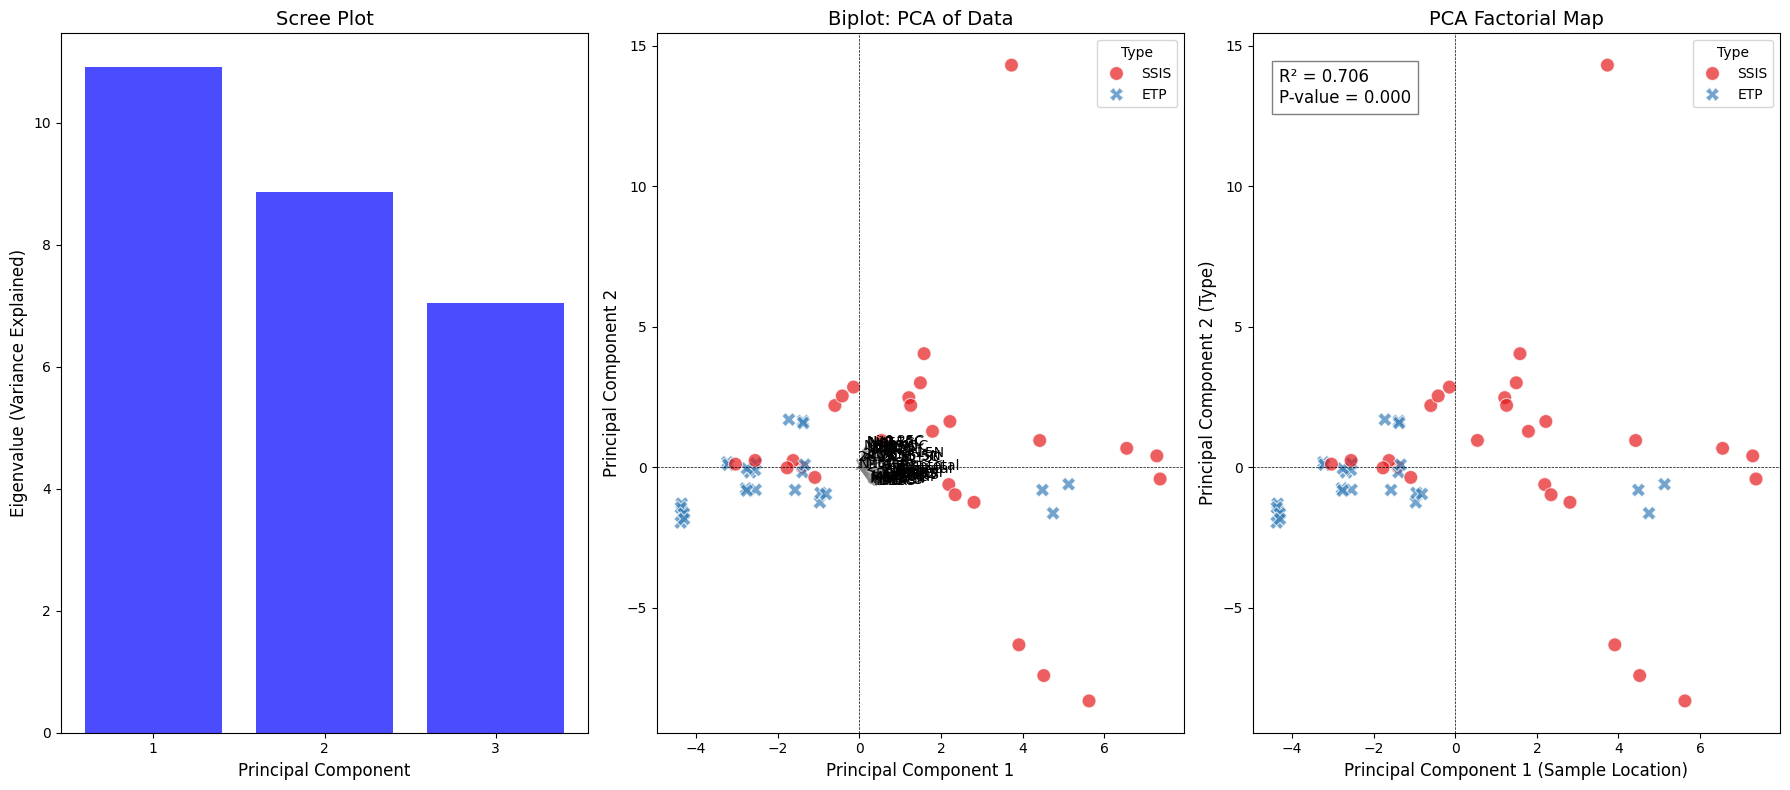

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

# Load your data
df = pd.read_excel(r'C:\Users\19085\Downloads\CorrelationData.xlsx')

# Select numeric columns for PCA
pca_columns = df.select_dtypes(include=[np.number]).columns.tolist()
pca_data = df[pca_columns].copy()

# Normalize the data
x = StandardScaler().fit_transform(pca_data)

# Perform PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(x)

# Create a DataFrame for PCA results (with 3 principal components)
pca_results = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_results['Sample Location'] = df['Samplelocation']  
pca_results['Type'] = df['Type']  

# Eigenvalues and Eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Loadings (eigenvectors scaled by the square root of explained variance)
loadings = eigenvectors.T * np.sqrt(eigenvalues)

# Calculate R² and p-values for ANOVA (for PC1 and PC2)
groups = [pca_results[pca_results['Type'] == type_]['PC1'] for type_ in pca_results['Type'].unique()]
f_stat, p_value = f_oneway(*groups)
r_squared = 1 - (f_stat / (f_stat + len(pca_results) - 1))  # Between-class variance

# Calculate Correlation Matrix of Principal Components
correlation_matrix = np.corrcoef(principal_components.T)

# Total variance (sum of eigenvalues)
total_variance = np.sum(eigenvalues)

# Variance percentage for each component
variance_percentage = (eigenvalues / total_variance) * 100

# Create DataFrames for each of the results
eigenvalues_df = pd.DataFrame(eigenvalues, index=['PC1', 'PC2', 'PC3'], columns=['Eigenvalue'])
variance_percentage_df = pd.DataFrame(variance_percentage, index=['PC1', 'PC2', 'PC3'], columns=['Variance Percentage'])

# Transpose eigenvectors to match the correct shape for DataFrame (variables as index, PCs as columns)
eigenvectors_df = pd.DataFrame(eigenvectors.T, columns=['PC1', 'PC2', 'PC3'], index=pca_columns)

# Loadings DataFrame (already aligned correctly)
loadings_df = pd.DataFrame(loadings, index=pca_columns, columns=['PC1', 'PC2', 'PC3'])

# Correlation Matrix DataFrame (between principal components)
correlation_matrix_df = pd.DataFrame(correlation_matrix, columns=['PC1', 'PC2', 'PC3'], index=['PC1', 'PC2', 'PC3'])

# Create a figure with three subplots for the new plots
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

# 1. Scree Plot (Eigenvalues)
axs[0].bar(range(1, 4), eigenvalues, color='blue', alpha=0.7)
axs[0].set_title('Scree Plot', fontsize=14)
axs[0].set_xlabel('Principal Component', fontsize=12)
axs[0].set_ylabel('Eigenvalue (Variance Explained)', fontsize=12)
axs[0].set_xticks(range(1, 4))
axs[0].axhline(0, color='black', linewidth=0.5, linestyle='--')

# 2. Biplot (PC1 vs PC2) - Loadings + Scores
axs[1].set_title('Biplot: PCA of Data', fontsize=14)

# Scatter plot for scores (data points)
sns.scatterplot(data=pca_results, x='PC1', y='PC2', hue='Type', style='Type', ax=axs[1], s=100, alpha=0.7)

# Arrows for loadings (variables)
for i, var in enumerate(loadings_df.index):
    axs[1].arrow(0, 0, loadings_df['PC1'].iloc[i], loadings_df['PC2'].iloc[i],
                 color='gray', alpha=0.5, head_width=0.05, head_length=0.1)
    axs[1].text(loadings_df['PC1'].iloc[i] * 1.1, loadings_df['PC2'].iloc[i] * 1.1, var,
                 fontsize=10)

axs[1].set_xlabel('Principal Component 1', fontsize=12)
axs[1].set_ylabel('Principal Component 2', fontsize=12)
axs[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[1].axvline(0, color='black', linewidth=0.5, linestyle='--')

# 3. PCA Factorial Map (PC1 vs PC2)
axs[2].set_title('PCA Factorial Map', fontsize=14)
sns.scatterplot(data=pca_results, x='PC1', y='PC2', hue='Type', style='Type', ax=axs[2], s=100, alpha=0.7)

# Display R² and p-value on the factorial map
axs[2].text(0.05, 0.9, f'R² = {r_squared:.3f}\nP-value = {p_value:.3f}', transform=axs[2].transAxes,
            fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})

axs[2].set_xlabel('Principal Component 1 (Sample Location)', fontsize=12)
axs[2].set_ylabel('Principal Component 2 (Type)', fontsize=12)
axs[2].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[2].axvline(0, color='black', linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()

# Save PCA results and additional information to Excel
with pd.ExcelWriter(r'C:\Users\19085\Downloads\N3PCA2.xlsx') as writer:
    pca_results.to_excel(writer, sheet_name='PCA Results', index=False)
    loadings_df.to_excel(writer, sheet_name='Loadings')
    eigenvalues_df.to_excel(writer, sheet_name='Eigenvalues')
    variance_percentage_df.to_excel(writer, sheet_name='Variance Percentage')
    eigenvectors_df.to_excel(writer, sheet_name='Eigenvectors')
    correlation_matrix_df.to_excel(writer, sheet_name='Correlation Matrix')
